In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
#Question1. What is the most frequent genre of movies released on Netflix?

In [12]:
# Extracting and preprocess 'Genre' column
genre_series = df['Genre'].dropna().str.split(',').explode().str.strip()
genre_counts = genre_series.value_counts()

# Displaying the most frequent genre(s)
most_frequent_genre = genre_counts.idxmax()
max_count = genre_counts.max()
print(f"🎬 The most frequent genre on Netflix is **'{most_frequent_genre}'** with {max_count} occurrences.")

🎬 The most frequent genre on Netflix is **'Drama'** with 3744 occurrences.


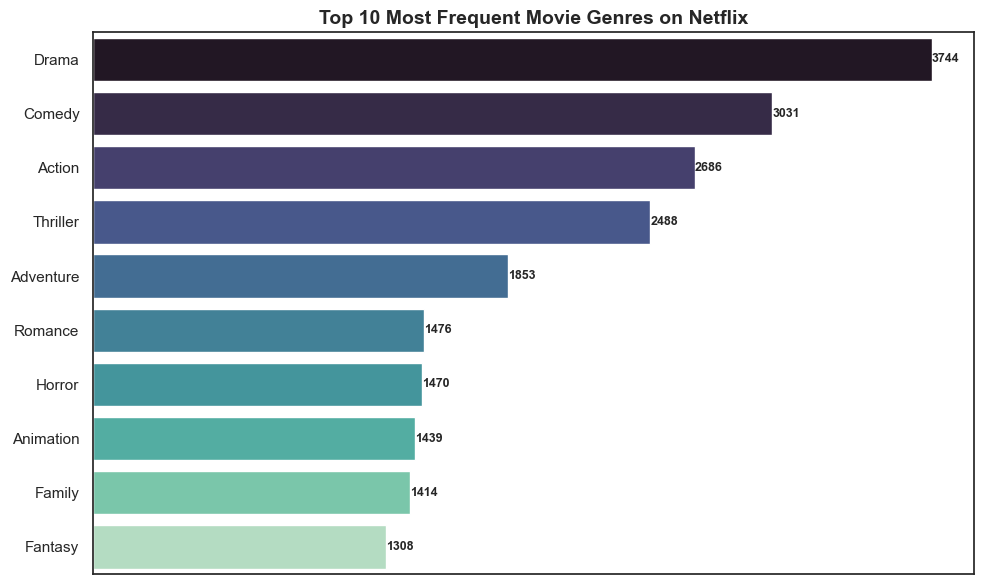

In [16]:
# Creating a Visualisation:

# Setting plot style and create visualization
sns.set_style('white')  # No gridlines

plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_counts.head(10).values,
    y=genre_counts.head(10).index,
    hue=genre_counts.head(10).index,   # To avoid warning
    palette='mako',
    dodge=False,
    legend=False
)

# Adding data labels to bars
for index, value in enumerate(genre_counts.head(10).values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=9, fontweight='bold')

# Final plot formatting
plt.title('Top 10 Most Frequent Movie Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)  # Remove gridlines
plt.gca().axes.xaxis.set_visible(False)  # Hide x-axis values

plt.tight_layout()
plt.savefig('top_genres_netflix.png', dpi=300)  # Saving the figure
plt.show() #Showing the plot

In [17]:
#Question2. Which has highest votes in vote avg column?

In [19]:
#Finding out which movie hass got the highest votes in vote avg column:

# Droping null values in relevant columns
df_cleaned = df.dropna(subset=['Vote_Average', 'Title'])

# Sorting by Vote_Average in descending order to get the top result
top_rated_movie = df_cleaned.sort_values(by='Vote_Average', ascending=False).iloc[0]

# Displaying the result
top_rated_movie

Release_Date                                                2020-04-09
Title                                       Kung Fu Master Huo Yuanjia
Overview             The young and vigorous Huo Yuanjia was only fo...
Popularity                                                      13.745
Vote_Count                                                           1
Vote_Average                                                      10.0
Original_Language                                                   zh
Genre                                                    Action, Drama
Poster_Url           https://image.tmdb.org/t/p/original/boXAHksMko...
Name: 9391, dtype: object

In [25]:
#Finding out top 10 movies with highest votes in vote avg column:

# Droping nulls from relevant columns
df_cleaned = df.dropna(subset=['Vote_Average', 'Title'])

# Sorting by Vote_Average descending and take top 10
top_10_votes = df_cleaned.sort_values(by='Vote_Average', ascending=False).head(10)

# Displaying the top 10 movies data
top_10_votes[['Title', 'Vote_Average']]

,Title,Vote_Average
9391,Kung Fu Master Huo Yuanjia,10.0
7339,Franco Escamilla: Por La Anécdota,9.2
667,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,9.1
2325,Impossible Things,9.1
7014,Sex School: Dorms of Desire,9.0
7401,My Sex Doll,9.0
6728,Mission «Sky»,9.0
2391,The Three Deaths of Marisela Escobedo,9.0
8647,Burn the Stage: The Movie,8.9
5069,"Ni tuyo, Ni mía",8.9


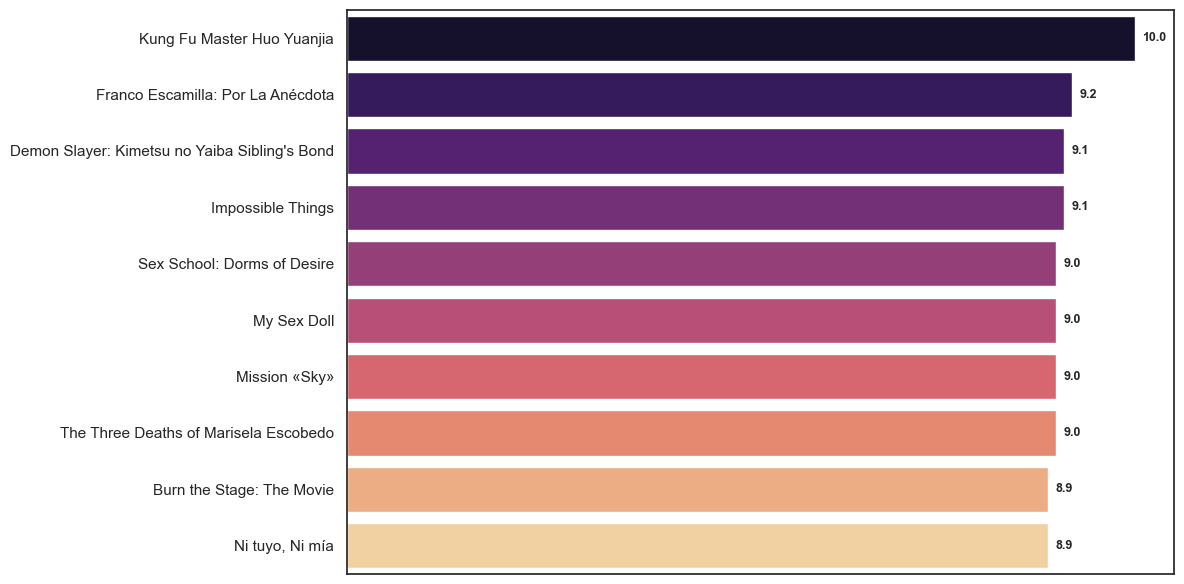

In [33]:
#Visualising the top 10 movies with highest votes in vote avg column:

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y='Title',
    x='Vote_Average',
    data=top_10_votes,
    palette='magma',
    hue='Title',
    dodge=False,
    legend=False
)

# Adding data labels
for index, value in enumerate(top_10_votes['Vote_Average']):
    plt.text(value + 0.1, index, f'{value:.1f}', va='center', fontweight='bold', fontsize=9)

# Formatting
plt.xlabel('')
plt.ylabel('')
plt.xticks([])        # Hide x-axis labels
plt.grid(False)       # Remove gridlines
plt.tight_layout()
plt.savefig('top_10_vote_avg_movies.png', dpi=300) #Saving the figure
plt.show() #Showing the plot

In [34]:
#Question3. What movie got the highest popularity? what's its genre?

In [35]:
# Getting the movie with the highest popularity
most_popular_movie = df.loc[df['Popularity'].idxmax()]

# Displaying the movie title, genre, and it's popularity
print("🎬 Most Popular Movie on Netflix:")
print(f"Title       : {most_popular_movie['Title']}")
print(f"Genre       : {most_popular_movie['Genre']}")
print(f"Popularity  : {most_popular_movie['Popularity']}")

🎬 Most Popular Movie on Netflix:
Title       : Spider-Man: No Way Home
Genre       : Action, Adventure, Science Fiction
Popularity  : 5083.954


In [36]:
#Now finding out the top 5 movies with the highest popularity:

In [37]:
# Sorting the DataFrame by 'Popularity' in descending order and getting the top 5 movies
top5_popular_movies = df.sort_values(by='Popularity', ascending=False).head(5)

# Displaying the top 5 movies with their title, genre, and their popularity
print("🎬 Top 5 Most Popular Movies on Netflix:")
print(top5_popular_movies[['Title', 'Genre', 'Popularity']])

🎬 Top 5 Most Popular Movies on Netflix:
                     Title                               Genre  Popularity
0  Spider-Man: No Way Home  Action, Adventure, Science Fiction    5083.954
1               The Batman            Crime, Mystery, Thriller    3827.658
2                  No Exit                            Thriller    2618.087
3                  Encanto  Animation, Comedy, Family, Fantasy    2402.201
4           The King's Man    Action, Adventure, Thriller, War    1895.511


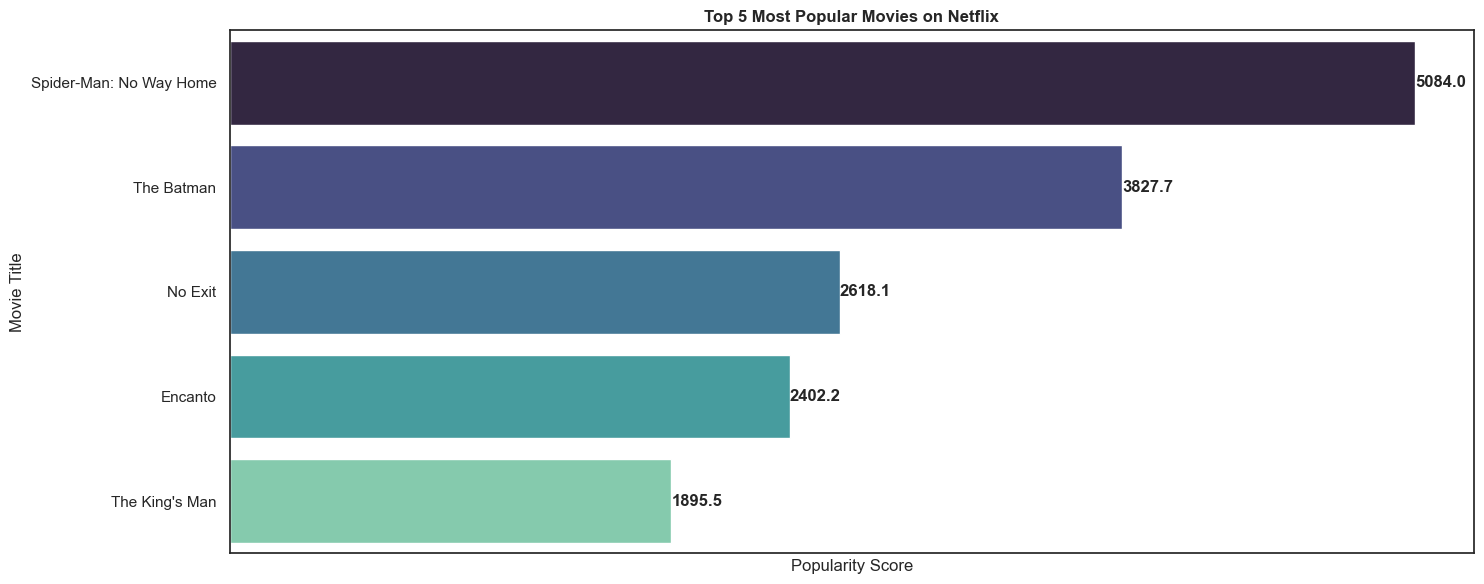

In [45]:
# Visualising the top 5 movies with the highest popularity:

# Setting style and figure size
plt.figure(figsize=(15, 6))
sns.set_style("white")  # Removes grid by default

# Barplot using genre as hue
sns.barplot(
    x='Popularity',
    y='Title',
    data=top5_popular_movies,
    hue='Title',            # Assign hue to suppress warning
    palette='mako',
    dodge=False,
    legend=False            # Hide legend
)

# Adding data labels to each bar
for index, value in enumerate(top5_popular_movies['Popularity']):
    plt.text(value + 0.5, index, f'{value:.1f}', va='center', fontweight='bold')

# Formatting
plt.title('Top 5 Most Popular Movies on Netflix', fontsize=12, fontweight='bold')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Title')
plt.xticks([])                 # Hide x-axis values
plt.grid(False)                # No grid
plt.tight_layout()
plt.savefig('top5_popular_movies_netflix.png', dpi=300) # Saving the plot
plt.show() # Showing the plot

In [46]:
#Question4: What movie got the lowest popularity? what's its genre?

In [47]:
#Finding the movie that has got the lowest popularity and it's genre:

# Droping rows with missing popularity values (if any)
df_cleaned = df.dropna(subset=['Popularity'])

# Finding the movie with the lowest popularity
lowest_popularity_movie = df_cleaned.loc[df_cleaned['Popularity'].idxmin()]

# Displaying the result
print("🎬 Movie with the Lowest Popularity:\n")
print(f"Title       : {lowest_popularity_movie['Title']}")
print(f"Popularity  : {lowest_popularity_movie['Popularity']}")
print(f"Genre       : {lowest_popularity_movie['Genre']}")

🎬 Movie with the Lowest Popularity:

Title       : The United States vs. Billie Holiday
Popularity  : 13.354
Genre       : Music, Drama, History


In [48]:
#Now finding out the top5 movies with lowest popularity:

In [49]:
#Finding out the top5 movies with lowest popularity:

# Dropping rows with missing popularity values
df_cleaned = df.dropna(subset=['Popularity'])

# Get top 5 movies with the lowest popularity
lowest_popularity_movies = df_cleaned.nsmallest(5, 'Popularity')[['Title', 'Popularity', 'Genre']]

# Displaying the data
print("🎬 Top 5 Movies with the Lowest Popularity:\n")
print(lowest_popularity_movies)

🎬 Top 5 Movies with the Lowest Popularity:

                                     Title  Popularity  \
9825  The United States vs. Billie Holiday      13.354   
9826                               Threads      13.354   
9824                          The Offering      13.355   
9823                      Violent Delights      13.356   
9821                     The Little Prince      13.357   

                                        Genre  
9825                    Music, Drama, History  
9826              War, Drama, Science Fiction  
9824                Mystery, Thriller, Horror  
9823                                   Horror  
9821  Science Fiction, Fantasy, Family, Music  


In [ ]:
#Question5. Which year has the most filmmed movies?

In [52]:
#Finding out the most filmed movies in the year

# Converting 'Release_Date' to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extracting the year
df['Year'] = df['Release_Date'].dt.year

# Droping rows with missing year
df_cleaned = df.dropna(subset=['Year'])

# Counting number of movies per year
movies_per_year = df_cleaned['Year'].value_counts().sort_index()

# Finding the year with the most movies
most_film_year = movies_per_year.idxmax()
most_film_count = movies_per_year.max()

# Displaying result
print(f"📅 The year with the most filmed movies is **{int(most_film_year)}** with **{most_film_count}** movies.")

📅 The year with the most filmed movies is **2021** with **714** movies.


In [55]:
#Finding out the top5 years with the most filmmed movies:

# Ensuring Release_Date is datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extracting the year
df['Year'] = df['Release_Date'].dt.year

# Droping rows where Year is NaN
df_cleaned = df.dropna(subset=['Year'])

# Counting movies per year and sort descending
movies_per_year = df_cleaned['Year'].value_counts().sort_values(ascending=False)

# Getting top 5 years with most movies
top5_years = movies_per_year.head(5)

# Showing the data
print("Top 5 years with the most filmed movies:")
print(top5_years)

Top 5 years with the most filmed movies:
Year
2021    714
2018    530
2017    510
2019    500
2016    470
Name: count, dtype: int64


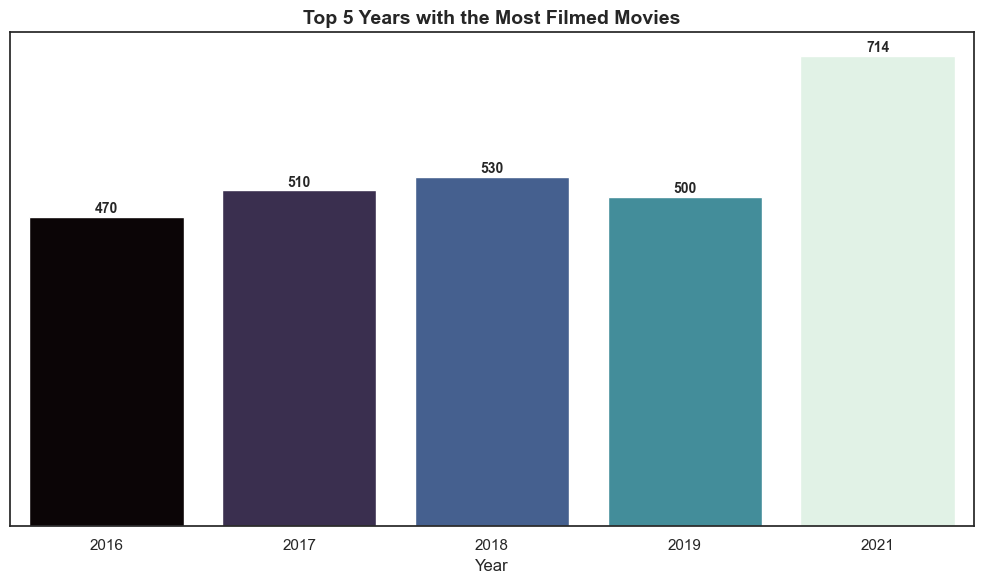

In [58]:
#Visualising the top5 years with most filmmed movies:

# Converting to DataFrame for visualization
top5_years_df = top5_years.reset_index()
top5_years_df.columns = ['Year', 'Movie Count']

# Visualization of the data 
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x='Year',
    y='Movie Count',
    data=top5_years_df,
    palette='mako',
    hue='Year',
    dodge=False,
    legend=False
)

# Removing y-axis ticks and labels
bars.yaxis.set_visible(False)

# Adding data labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,  # Slightly above the bar
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Top 5 Years with the Most Filmed Movies', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('top5_years_most_filmed_movies.png', dpi=300) #Saving the figure
plt.show() #Showing the result